 What is K-Nearest Neighbors (KNN) and how does it work

 - KNN is a supervised learning algorithm used for classification and regression.
- It predicts a class or value based on the K nearest data points in the dataset.
- Uses distance metrics (like Euclidean, Manhattan) to find neighbors.

What is the difference between KNN Classification and KNN Regression 

- KNN Classification: Assigns a class label based on majority voting among K closest neighbors.
- KNN Regression: Predicts a continuous value by averaging K nearest neighbors.


What is the role of the distance metric in KNN?

- Distance metric determines how “close” two points are.
- Common ones:
- Euclidean distance (default, straight-line distance).
- Manhattan distance (grid-like movement).
- Minkowski distance (generalized metric).


What is the Curse of Dimensionality in KNN?

- As the number of features (dimensions) increases, points become sparse.
- Distance-based methods struggle, making classification less effective


How can we choose the best value of K in KNN What are KD Tree and Ball Tree in KNN 

- Small K (e.g., K=1 or K=3) → More sensitive to noise (overfitting).
- Large K (e.g., K=10 or K=15) → More stable but can underfit.
- Common rule: Start with sqrt(n) (square root of dataset size).


When should you use KD Tree vs. Ball Tree What are the disadvantages of KNN How does feature scaling affect KNN 


- Use KD Tree if dimensions are low.
- Use Ball Tree for high dimensions or unevenly distributed data.
Disadvantages of KNN
- Slow on large datasets (requires storing all training data).
- Sensitive to feature scaling (distance-based calculations).
- Not great for real-time predictions (searching all points takes time).
Effect of Feature Scaling in KNN
- KNN relies on distances, so unscaled features distort calculations.
- Apply Standardization or Normalization for fairness.


What is PCA
- PCA is a dimensionality reduction technique that transforms data into principal components to retain variance.



How does PCA work 

- Computes covariance matrix of the dataset.
- Finds eigenvectors & eigenvalues.
- Transforms data into lower dimensions.


What is the geometric intuition behind PCA 

- PCA finds new axes that capture maximum variance.
- Projects data onto these directions.


What is the difference between Feature Selection and Feature Extraction

- Feature Selection: Picks relevant features from the dataset.
- Feature Extraction (PCA): Creates new transformed features.


What are Eigenvalues and Eigenvectors in PCA 

- Eigenvectors: Define new directions for data projection.
- Eigenvalues: Indicate the importance (variance) of each principal component.


How do you decide the number of components to keep in PCA Can PCA be used for classification

- Use explained variance ratio.
- Keep components that retain 80-90% of total variance.
PCA is unsupervised but can reduce feature dimensions for classifiers like KNN, SVM.



What are the limitations of PCA How do KNN and PCA complement each other 

Limitations of PCA
- Loss of interpretability (original features are transformed).
- Struggles with non-linear data.
PCA reduces dimensions, making KNN faster & more accurate in high-dimensional data.


How does KNN handle missing values in a dataset

- Find the K nearest neighbors of the instance with missing values.
- Estimate the missing value by averaging (for numerical features) or taking   the mode (for categorical features) of its neighbors.
- Replace missing values with the computed values.


In [1]:
# 1. Train a KNN Classifier on the Iris Dataset and Print Accurac

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


data = load_iris()
X, y = data.data, data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [2]:
# 2. Train a KNN Regressor on Synthetic Data and Evaluate Using MSE

from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X, y = make_regression(n_samples=200, n_features=5, noise=0.1, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 1213.3783660326212


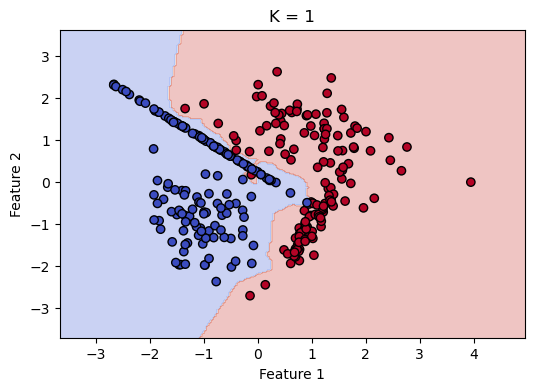

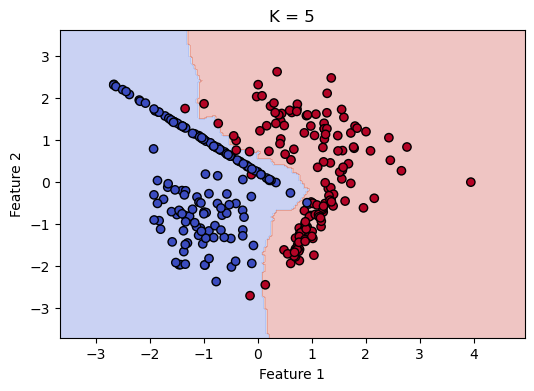

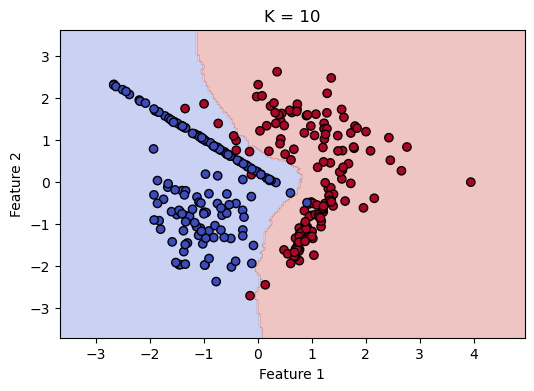

In [1]:
# 4. Train a KNN Classifier with Different Values of K and Visualize Decision Boundaries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier  # <-- Missing import


X, y = make_classification(n_samples=300, n_features=2, n_classes=2, 
                           n_informative=2, n_redundant=0, random_state=42)


for k in [1, 5, 10]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)

    # Create a mesh grid for plotting decision boundaries
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    
    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(f"K = {k}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


In [11]:
# 5. Apply Feature Scaling Before Training a KNN Model and Compare Results 

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


X, y = make_classification(n_samples=300, n_features=2, n_classes=2,
                           n_informative=2, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN without scaling
model_unscaled = KNeighborsClassifier(n_neighbors=3)
model_unscaled.fit(X_train, y_train)
accuracy_unscaled = accuracy_score(y_test, model_unscaled.predict(X_test))


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = KNeighborsClassifier(n_neighbors=3)
model_scaled.fit(X_train_scaled, y_train)
accuracy_scaled = accuracy_score(y_test, model_scaled.predict(X_test_scaled))

print(f"Accuracy without scaling: {accuracy_unscaled:.2f}")
print(f"Accuracy with scaling: {accuracy_scaled:.2f}")


Accuracy without scaling: 0.95
Accuracy with scaling: 0.95


In [3]:
#  Train a PCA model on synthetic data and print the explained variance ratio for each component

import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification


X, _ = make_classification(n_samples=100, n_features=5, n_informative=3, n_redundant=0, random_state=42)


pca = PCA()
pca.fit(X)


explained_variance_ratio = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")



Principal Component 1: 0.3570
Principal Component 2: 0.2522
Principal Component 3: 0.1576
Principal Component 4: 0.1209
Principal Component 5: 0.1122


In [4]:
# Apply PCA before training a KNN Classifier and compare accuracy with and without PCA

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


X, y = make_classification(n_samples=1000, n_features=10, n_informative=7, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_without_pca = accuracy_score(y_test, y_pred)
print(f"Accuracy without PCA: {accuracy_without_pca:.4f}")


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy with PCA: {accuracy_with_pca:.4f}")


Accuracy without PCA: 0.9000
Accuracy with PCA: 0.8400


In [5]:
# Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


X, y = make_classification(n_samples=1000, n_features=10, n_informative=7, n_redundant=0, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'n_neighbors': list(range(1, 21)),  # Try k from 1 to 20
}

knn = KNeighborsClassifier()


grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_k = grid_search.best_params_['n_neighbors']
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


print(f"✅ Best number of neighbors: {best_k}")
print(f"📊 Accuracy with best k on test data: {accuracy:.4f}")


✅ Best number of neighbors: 7
📊 Accuracy with best k on test data: 0.9167


In [6]:
#  Train a KNN Classifier and check the number of misclassified samples

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=10, n_informative=7, n_redundant=0, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


knn = KNeighborsClassifier(n_neighbors=5)  # You can change k here
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
misclassified = (y_pred != y_test).sum()


print(f"📊 Accuracy: {accuracy:.4f}")
print(f"❌ Number of misclassified samples: {misclassified}")


📊 Accuracy: 0.9000
❌ Number of misclassified samples: 30


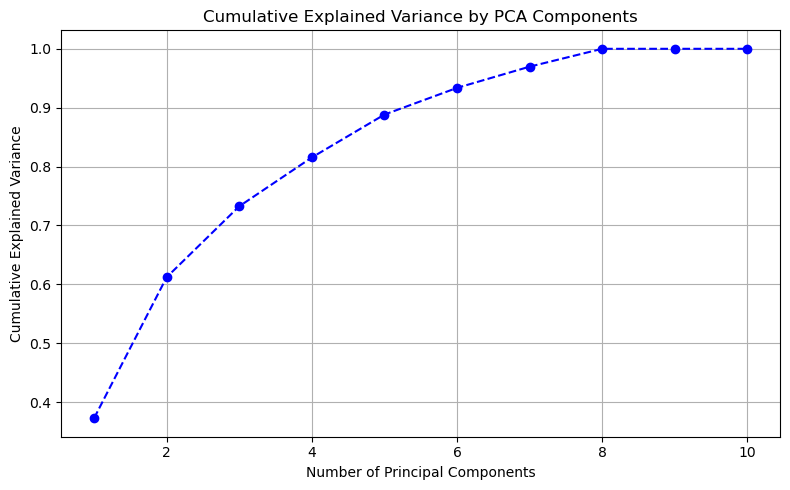

In [7]:
# Train a PCA model and visualize the cumulative explained variance.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

X, _ = make_classification(n_samples=1000, n_features=10, n_informative=7, random_state=42)


pca = PCA()
pca.fit(X)


cumulative_variance = np.cumsum(pca.explained_variance_ratio_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
# Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare
#accuracy4

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


X, y = make_classification(n_samples=1000, n_features=10, n_informative=7, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train, y_train)
y_pred_uniform = knn_uniform.predict(X_test)
acc_uniform = accuracy_score(y_test, y_pred_uniform)


knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train, y_train)
y_pred_distance = knn_distance.predict(X_test)
acc_distance = accuracy_score(y_test, y_pred_distance)

print(f"Accuracy with uniform weights:  {acc_uniform:.4f}")
print(f"Accuracy with distance weights: {acc_distance:.4f}")


Accuracy with uniform weights:  0.9400
Accuracy with distance weights: 0.9400


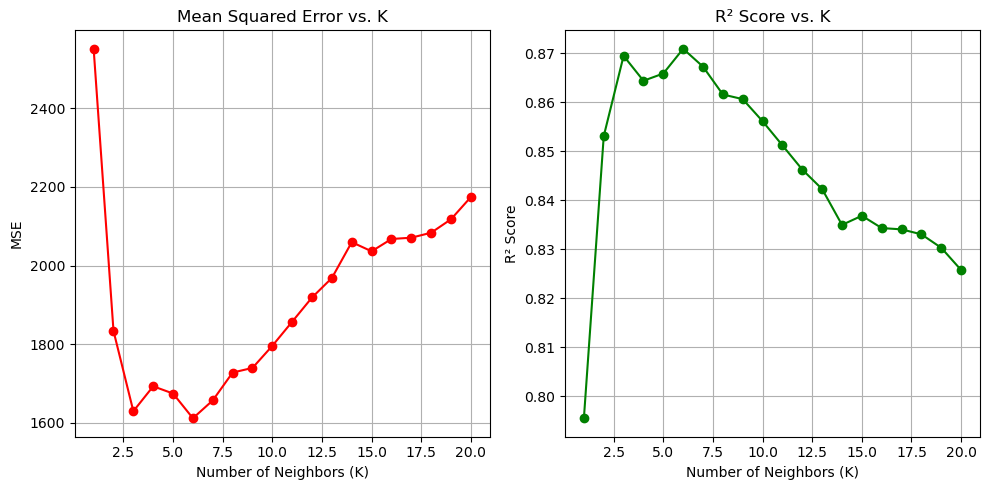

In [9]:
#Train a KNN Regressor and analyze the effect of different K values on performance

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


X, y = make_regression(n_samples=500, n_features=5, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


k_values = range(1, 21)
mse_scores = []
r2_scores = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, mse_scores, marker='o', color='r')
plt.title('Mean Squared Error vs. K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('MSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, r2_scores, marker='o', color='g')
plt.title('R² Score vs. K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('R² Score')
plt.grid(True)

plt.tight_layout()
plt.show()


In [10]:
# Implement KNN Imputation for handling missing values in a dataset4

import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

data = {
    'Feature1': [1, 2, np.nan, 4, 5],
    'Feature2': [5, np.nan, np.nan, 8, 10],
    'Feature3': [10, 11, 12, 13, 14]
}
df = pd.DataFrame(data)
print("Original Data with Missing Values:")
print(df)


imputer = KNNImputer(n_neighbors=2)  # You can change k
imputed_array = imputer.fit_transform(df)


imputed_df = pd.DataFrame(imputed_array, columns=df.columns)
print("\nData after KNN Imputation:")
print(imputed_df)


Original Data with Missing Values:
   Feature1  Feature2  Feature3
0       1.0       5.0        10
1       2.0       NaN        11
2       NaN       NaN        12
3       4.0       8.0        13
4       5.0      10.0        14

Data after KNN Imputation:
   Feature1  Feature2  Feature3
0       1.0       5.0      10.0
1       2.0       6.5      11.0
2       3.0       6.5      12.0
3       4.0       8.0      13.0
4       5.0      10.0      14.0


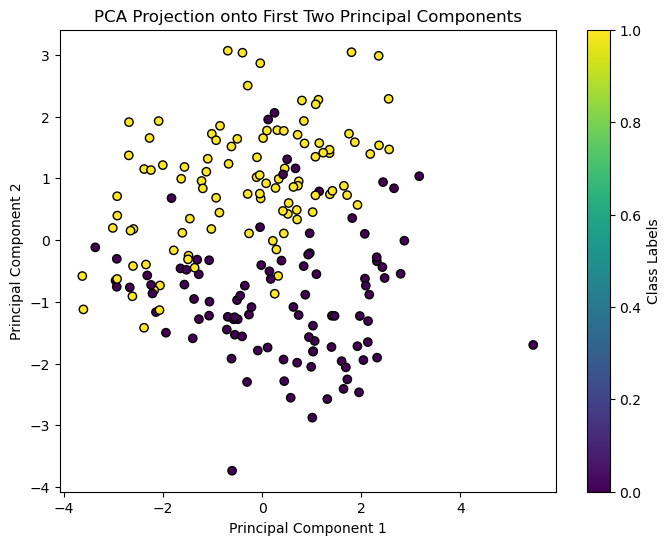

In [11]:
# Train a PCA model and visualize the data projection onto the first two principal components4

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=200, n_features=5, random_state=42)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection onto First Two Principal Components")
plt.colorbar(label="Class Labels")
plt.show()

In [12]:
#  Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

import numpy as np
import time
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


X, y = make_classification(n_samples=1000, n_features=10, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for algo in ['kd_tree', 'ball_tree']:
    start_time = time.time()  

    model = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    exec_time = time.time() - start_time  

    print(f"Algorithm: {algo}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Execution Time: {exec_time:.4f} seconds")
    print("-" * 40)

Algorithm: kd_tree
Accuracy: 0.8000
Execution Time: 0.0190 seconds
----------------------------------------
Algorithm: ball_tree
Accuracy: 0.8000
Execution Time: 0.0200 seconds
----------------------------------------


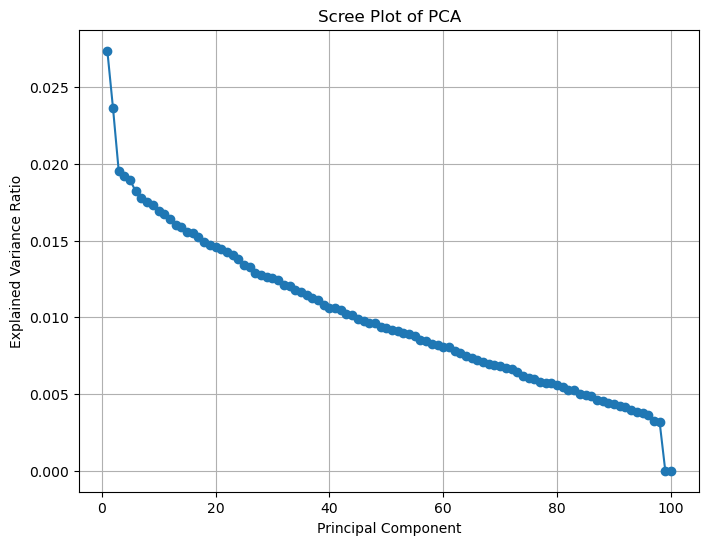

In [13]:
# Train a PCA model on a high-dimensional dataset and visualize the Scree plot

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=500, n_features=100, random_state=42)


pca = PCA()
X_pca = pca.fit_transform(X)


explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot of PCA")
plt.grid(True)
plt.show()

In [14]:
#   Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score


X, y = make_classification(n_samples=500, n_features=10, n_classes=2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.8913
Recall: 0.8913
F1-Score: 0.8913


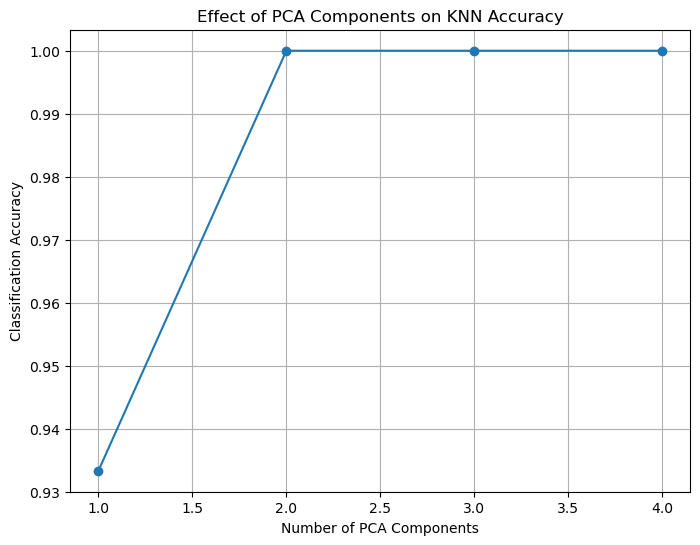

In [15]:
#  Train a PCA model and analyze the effect of different numbers of components on accuracy4

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


data = load_iris()
X, y = data.data, data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


components_range = range(1, X_train.shape[1] + 1)  # Try all possible component counts
accuracies = []

for n in components_range:
    
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)


plt.figure(figsize=(8, 6))
plt.plot(components_range, accuracies, marker='o', linestyle='-')
plt.xlabel("Number of PCA Components")
plt.ylabel("Classification Accuracy")
plt.title("Effect of PCA Components on KNN Accuracy")
plt.grid(True)
plt.show()

In [16]:
# Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


data = load_wine()
X, y = data.data, data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

Classification Report:
              precision    recall  f1-score   support

     class_0       0.86      0.86      0.86        14
     class_1       0.79      0.79      0.79        14
     class_2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36



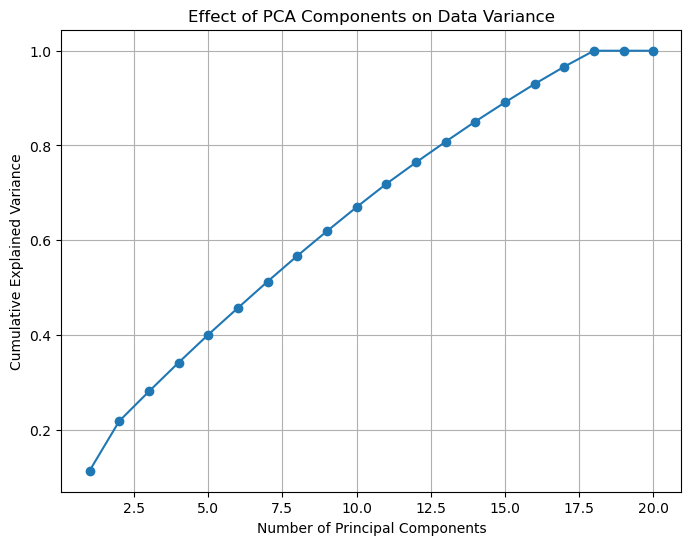

In [17]:
# Train a PCA model and analyze the effect of different numbers of components on data variance

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=500, n_features=20, random_state=42)


pca = PCA()
X_pca = pca.fit_transform(X)


explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Effect of PCA Components on Data Variance")
plt.grid(True)
plt.show()

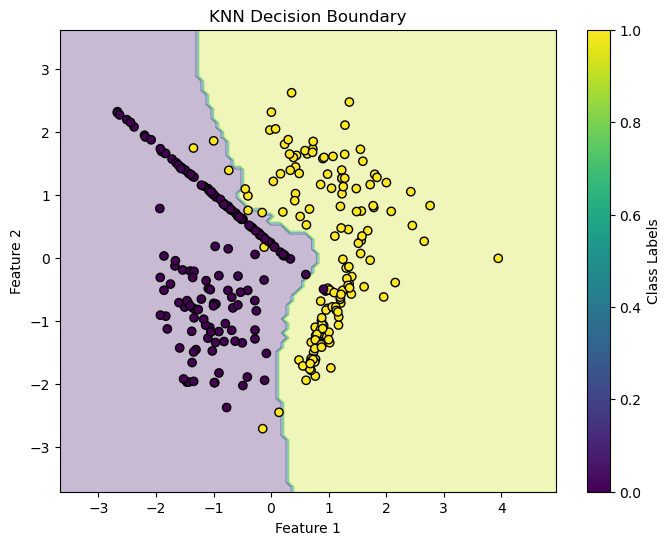

In [21]:
# Train a KNN Classifier and visualize the decision boundary

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

grid_points = np.c_[xx.ravel(), yy.ravel()]


Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)


plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='viridis')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN Decision Boundary")
plt.colorbar(label="Class Labels")
plt.show()

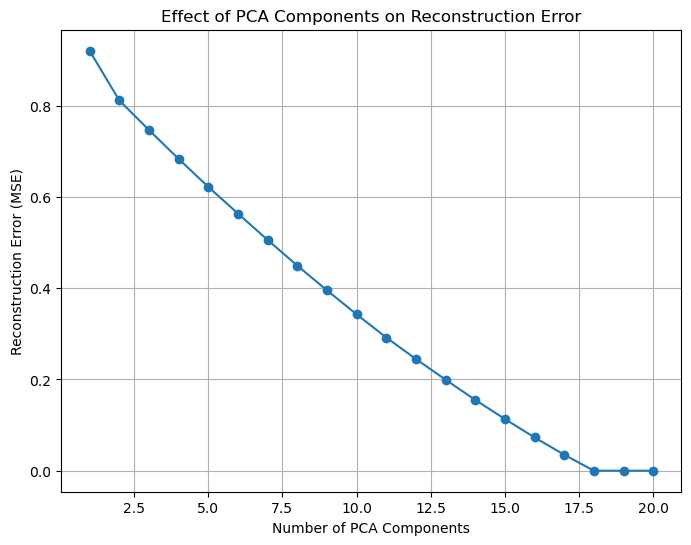

In [22]:
# Train a PCA model and visualize the data reconstruction error after reducing dimensions

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error


X, y = make_classification(n_samples=500, n_features=20, random_state=42)

components_range = range(1, X.shape[1] + 1)  
reconstruction_errors = []

for n in components_range:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X) 
    X_reconstructed = pca.inverse_transform(X_pca)  

    
    error = mean_squared_error(X, X_reconstructed)
    reconstruction_errors.append(error)

plt.figure(figsize=(8, 6))
plt.plot(components_range, reconstruction_errors, marker='o', linestyle='-')
plt.xlabel("Number of PCA Components")
plt.ylabel("Reconstruction Error (MSE)")
plt.title("Effect of PCA Components on Reconstruction Error")
plt.grid(True)
plt.show()

In [23]:
# Train a KNN Classifier and perform feature selection before training

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score


data = load_wine()
X, y = data.data, data.target


feature_selector = SelectKBest(score_func=f_classif, k=5)  
X_selected = feature_selector.fit_transform(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy after Feature Selection: {accuracy:.4f}")

Model Accuracy after Feature Selection: 0.7778
